# Benjamin Norton

## Research question/interests

Briefly describe your research question or interests here.

### Interest

I plan to investigate the relationship between probable asteroid impacts and asteroid size. I want to investigate this because asteroids of different sizes can have varying levels of potential damage to the earth. A large asteroid has a higher potential for destruction and can cause widespread damage. In contrast, a smaller one may burn up upon entering the earth's atmosphere or land in a remote area. I plan to see if there are any correlations in this dataset and see if I can use that information to predict future impacts.
<br>
### Research question
**Can we identify potentially hazardous asteroids (PHAs) based on their orbital parameters and physical characteristics?**
<br>
In order to answer this question I will first remove any duplicate or irrelevant data, fill in any missing values, and standardize units and formats across all variables and then merge the datasets into a single dataframe with the object name as the key.
<br>
I will then use the orbit axis, eccentricity, inclination, perihelion argument, node longitude, and other parameters to classify asteroids into different groups based on their likelihood of colliding with Earth (I can also use the impact data cumulative collision probability). I will then look at the asteroid diameter, velocity, and magnitude to estimate the potential impact energy and damage, thus, determining the PHA status of the asteroid.

## Load Data

In [1]:
import pandas as pd
import re

impacts = pd.read_csv("../data/raw/impacts.csv")
orbits = pd.read_csv("../data/raw/orbits.csv")
NEO = pd.read_csv("../data/raw/NEO_Earth_Close_Approaches.csv")

## Data cleaning

In [2]:
impacts = impacts.drop_duplicates()
impacts = impacts.dropna()
impacts = impacts.reset_index(drop=True)

orbits = orbits.drop_duplicates()
orbits = orbits.dropna()
# remove non-breaking spaces
orbits = orbits.replace("\xa0", " ", regex=True)
orbits = orbits.reset_index(drop=True)

NEO = NEO.drop_duplicates()
NEO = NEO.dropna()
NEO = NEO.replace("\xa0", " ", regex=True)
if "Object" in NEO:
    NEO["Object Name"] = NEO["Object"].str.strip()
    NEO = NEO.drop(columns=["Object"])
NEO = NEO.reset_index(drop=True)

# remove whitespace from ends of object names
impacts["Object Name"] = impacts["Object Name"].str.strip()
orbits["Object Name"] = orbits["Object Name"].str.strip()

# replace names in impacts and orbits that match `Name (Year String)` with `Year String`
# ie 101955 Bennu (1999 RQ36) -> 1999 RQ36
pattern = r'.*\((.*)\)'
impacts['Object Name'] = impacts['Object Name'].apply(lambda x: re.sub(pattern, r'\1', x))
orbits['Object Name'] = orbits['Object Name'].apply(lambda x: re.sub(pattern, r'\1', x))
NEO['Object Name'] = NEO['Object Name'].apply(lambda x: re.sub(pattern, r'\1', x))

## Cleaned Data Export

In [3]:
impacts.to_csv("../data/processed/impacts.csv", index=False)
orbits.to_csv("../data/processed/orbits.csv", index=False)
NEO.to_csv("../data/processed/NEO_Earth_Close_Approaches.csv", index=False)

## Data merging

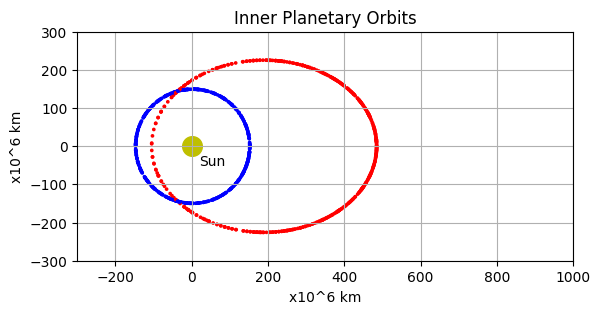

2010 TD54 came within 145109.934579 km of Earth at time 1979-Oct-09 18:11 ± 8_22:06


In [4]:
import group34_code.asteroid as ast

asteroids = pd.merge(orbits, NEO, on="Object Name", how='right')
asteroids.dropna(subset=["Object Classification"], inplace=True) # remove rows with no classification (ie no orbit data)
asteroids.drop_duplicates(subset=["Object Name"], inplace=True) # remove duplicate rows
asteroids = asteroids.reset_index(drop=True)

asteroids.to_csv("../data/processed/asteroids.csv", index=False)

object_name = asteroids["Object Name"]
orbit_axis = asteroids["Orbit Axis (AU)"]
eccentricity = asteroids["Orbit Eccentricity"]
inclination = asteroids["Orbit Inclination (deg)"]
perihelion_arg = asteroids["Perihelion Argument (deg)"]
perihelion_dist = asteroids["Perihelion Distance (AU)"]
node_longitude = asteroids["Node Longitude (deg)"]
mean_anomaly = asteroids["Mean Anomoly (deg)"]  # typo in original data

ast_index = asteroids[asteroids["Object Name"] == "2010 TD54"].index[0]
asteroid = asteroids.iloc[ast_index]
ast.render_asteroid_trajectory(asteroid)
